In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("./input_data/gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.copy()
y = X.pop("Activity")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=241)

In [8]:
model = GradientBoostingClassifier(
        n_estimators=250, verbose=True, random_state=241)

model.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.3199           11.23s
         2           1.2645           10.94s
         3           1.2170           10.78s
         4           1.1775           10.70s
         5           1.1404           10.73s
         6           1.1106           10.70s
         7           1.0844           10.52s
         8           1.0617           10.37s
         9           1.0411           10.26s
        10           1.0223           10.19s
        20           0.8864            8.87s
        30           0.7844            7.74s
        40           0.7176            6.96s
        50           0.6590            6.74s
        60           0.6120            6.40s
        70           0.5599            6.20s
        80           0.5242            5.82s
        90           0.4829            5.33s
       100           0.4473            4.86s
       200           0.2379            1.47s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=241,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [20]:
def sigmoid(y_pred):
    return 1 / (1 + np.exp(-y_pred))

def find_log_loss(model, X, y):
    out = []
    for pred in model.staged_decision_function(X):
        y_sigm = [sigmoid(y_pred[0]) for y_pred in pred.tolist()]
        out.append(log_loss(y, y_sigm))
    return out


In [36]:
learninig_rates = [1, 0.5, 0.3, 0.2, 0.1]
arr_test, arr_train = [], []

for learning_rate in learninig_rates:
    
    model = GradientBoostingClassifier(
        n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    
    test_score = find_log_loss(model, X_test, y_test)  
    train_score = find_log_loss(model, X_train, y_train)
    
    arr_test.append(test_score)    
    arr_train.append(train_score)

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.39s
         2           0.9192           10.81s
         3           0.8272           10.02s
         4           0.7834            8.81s
         5           0.7109            8.50s
         6           0.6368            8.88s
         7           0.5797            8.82s
         8           0.5610            8.19s
         9           0.5185            7.97s
        10           0.4984            7.57s
        20           0.1999            7.51s
        30           0.1313            6.81s
        40           0.0790            6.73s
        50           0.0511            6.36s
        60           0.0352            6.11s
        70           0.0245            5.70s
        80           0.0162            5.36s
        90           0.0114            5.01s
       100           0.0077            4.71s
       200           0.0004            1.38s
      Iter       Train Loss   Remaining Time 
        

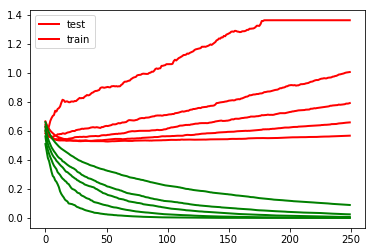

In [37]:
plt.figure()
[plt.plot(test_loss, c='r', linewidth=2) for test_loss in arr_test]
[plt.plot(train_loss, c='g', linewidth=2) for train_loss in arr_train]
plt.legend(['test', 'train'])

In [43]:
w = open("./week5/crossval.dat", "w")
w.write("overfitting")
w.close()

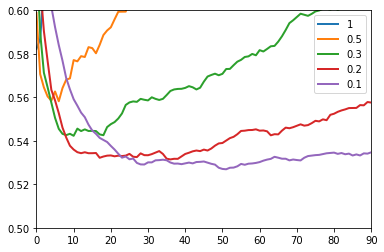

In [38]:
[plt.plot(test_loss, linewidth=2, label=f"{learninig_rates[i]}") for i, test_loss in enumerate(arr_test)]

plt.xlim(0,90)
plt.ylim(0.5, 0.6)

plt.legend()
plt.show()

In [40]:
[np.min(test_loss) for test_loss in arr_test]

[0.5822942594278476,
 0.5582025523164261,
 0.5423141110024554,
 0.5314507963190638,
 0.5269201872275844]

In [41]:
# overall
min_val = np.min(arr_test)
min_iter = np.argmin(arr_test[-1])

In [50]:
# for learning_rate = 0.2
min_val = np.min(arr_test[-2])
min_iter = np.argmin(arr_test[-2])

w = open("./week5/log_loss_boosting.dat", "w")
w.write(f"{np.round(min_val, 2)} {min_iter}")
w.close()

In [47]:
model = RandomForestClassifier(n_estimators=min_iter, random_state=241)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=None,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [51]:
out = log_loss(y_test, model.predict_proba(X_test))

In [52]:
w = open("./week5/log_loss_rf.dat", "w")
w.write(f"{np.round(out, 2)}")
w.close()